# Stochastic Simulation - Coursework 2023

This assignment has two parts and graded over **100 marks**. Some general remarks:

- The assignment is due on **11 December 2023, 1PM GMT**, to be submitted via Blackboard (see the instructions on the course website).
- You should use this .ipynb file as a skeleton and you should submit a PDF report. Prepare the IPython notebook and export it as a PDF. If you can't export your notebook as PDF, then you can export it as HTML and then use the "Print" feature in browser (Chrome: File -> Print) and choose "Save as PDF". 
- Your PDF should be no longer than 20 pages. But please be concise.
- You can reuse the code from the course material but note that this coursework also requires novel implementations. Try to personalise your code in order to avoid having problems with plagiarism checks. You can use Python's functions for sampling random variables of all distributions of your choice.
- **Please comment your code properly.**

Let us start our code.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng(36) # You can change this.

## Q1: Model Selection via Perfect Monte Carlo (40 marks)

Consider the following probabilistic model
\begin{align*}
    p(x) &= \mathcal{N}(x; 5, 0.01), \\
    p(y_i|x) &= \mathcal{N}(y_i; \theta x, 0.05),
\end{align*}
for $i = 1, \ldots, T$ where $y_i$ are conditionally independent given $x$. You are given a dataset (see it on Blackboard) denoted here as $y_{1:T}$ for $T = 100$. As defined in the course, we can find the marginal likelihood as
\begin{align*}
p_\theta(y_{1:T}) = \int p_\theta(y_{1:T}|x) p(x) \mathrm{d} x,
\end{align*}
where we have left $\theta$-dependence in the notation to emphasise that the marginal likelihood is a function of $\theta$.

Given the samples from prior $p(x)$, we can identify our test function above as $\varphi(x) = p_\theta(y_{1:T}|x)$.

**(i)** The first step is to write a log-likelihood function of $y_{1:T}$, i.e., $p_\theta(y_{1:T} | x)$. Note that, this is the joint likelihood of conditionally i.i.d. observations $y_i$ given $x$. This function should take input the data set vector `y` as loaded from `y_perfect_mc.txt` below, $\theta$ (scalar), and $x$ (scalar), and `sig` (likelihood variance which is given as 0.05 in the question but leave it as a variable) values to evaluate the log-likelihood. Note that log-likelihood will be a **sum** in this case, over individual log-likelihoods. **<span style="color:blue">(10 marks)</span>**

In [2]:
# put the dataset in the same folder as this notebook
# the following line loads y_perfect_mc.txt
y = np.loadtxt('y_perfect_mc.txt')
y = np.array(y, dtype=np.float64)

# fill in your function below.

def log_likelihood(y, x, theta, sig): 
    mu = theta * x
    log_l = np.sum(-0.5*np.log(2*np.pi*sig) - ((y - mu) ** 2) / (2*sig))
    return log_l

print(log_likelihood(y, 1, 1, 1))
print(log_likelihood(y, 1, 1, 0.1))
print(log_likelihood(y, -1, 2, 0.5))

-9898.905478066723
-98046.88084613332
-28974.21408410412


**(ii)** Write a logsumexp function. Let $\mathbf{v}$ be a vector of log-quantities and assume we need to compute $\log \sum_{i=1}^N \exp(v_i)$ where $\mathbf{v} = (v_1, \ldots, v_N)$. This function is given as
\begin{align*}
\log \sum_{i=1}^N \exp(v_i) = \log \sum_{i=1}^N \exp(v_i - v_{\max}) + v_{\max},
\end{align*}
where $v_{\max} = \max_{i = 1,\ldots,N} v_i$. Implement this as a function which takes a vector of log-values and returns the log of the sum of exponentials of the input values. **<span style="color:blue">(10 marks)</span>**

In [3]:
def logsumexp(v):
    # v is a vector
    # Function to compute logsumexp
    vmax = np.max(v)
    log_sum = vmax + np.log(np.sum(np.exp(v - vmax)))
    return log_sum





# uncomment and evaluate your logsumexp function (do not remove)
print(logsumexp(np.array([1, 2, 3])))
print(logsumexp(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])))
print(logsumexp(np.array([5, 6, 9, 12])))

3.4076059644443806
10.45862974442671
12.051811977232925


**(iii)** Now we are at the stage of implementing the log marginal likelihood estimator. Inspect your estimator as described in Part (i). Its particular form is not implementable without using the trick you have coded in Part (iii). Now, implement a function that returns the **log** of the MC estimator you derived in Part (i). This function will take in

- `y` dataset vector
- $\theta$ parameter (scalar)
- `x_samples` (`np.array` vector) which are $N$ Monte Carlo samples.
- a variance (scalar) variable `sig` for the joint log likelihood $p_\theta(y_{1:T} | x)$ that will be used in `log_likelihood` function (we will set this to 0.05 as given in the question).

**Hint:** Notice that the log of the MC estimator of the marginal likelihood takes the form
\begin{align*}
\log \frac{1}{N} \sum_{i=1}^N p_\theta(y_{1:T} | x^{(i)}),
\end{align*}
as given in the question. You have to use $p_\theta(y_{1:T} | x^{(i)}) = \exp(\log p_\theta(y_{1:T} | x^{(i)}))$ to get a `logsumexp` structure, i.e., $\log$ and $\text{sum}$ (over particles) and $\exp$ of $\log p_\theta(y_{1:T} | x^{(i)})$ where $i = 1, \ldots, N$ and $x^{(i)}$ are the $N$ Monte Carlo samples (do **not** forget $1/N$ term too). Therefore, now use the function of Part (i) to compute $\log p_\theta(y_{1:T} | x^{(i)})$ for every $i = 1,\ldots, N$ and Part (ii) `logsumexp` these values to compute the estimate of log marginal likelihood. **<span style="color:blue">(10 marks)</span>**

In [4]:
def log_marginal_likelihood(y, theta, x_samples, sig):
    log_likelihoods = np.array([log_likelihood(y, x, theta, sig) 
                                for x in x_samples])
    N = len(x_samples)
    return np.log(1/N) + logsumexp(log_likelihoods)

# uncomment and evaluate your marginal likelihood (do not remove)

print(log_marginal_likelihood(y, 1, np.array([-1, 1]), 1))
print(log_marginal_likelihood(y, 1, np.array([-1, 1]), 0.1))
print(log_marginal_likelihood(y, 2, np.array([-1, 1]), 0.5))

# note that the above test code takes 2 dimensional array 
# instead of N particles for simplicity

-9899.598625247283
-98047.57399331388
-16970.96811085916


**(iv)** We will now try to find the most likely $\theta$. For this part, you will run your `log_marginal_likelihood` function for a range of $\theta$ values. Note that, for every $\theta$ value, you need to sample $N$ new samples from the prior (do not reuse the same samples). Compute your estimator of the $\log \hat{\pi}_{\text{MC}}^N \approx \log p_\theta(y_{1:T})$ for $\theta$-range given below. Plot the log marginal likelihood estimator as a function of $\theta$. **<span style="color:blue">(5 marks)</span>**

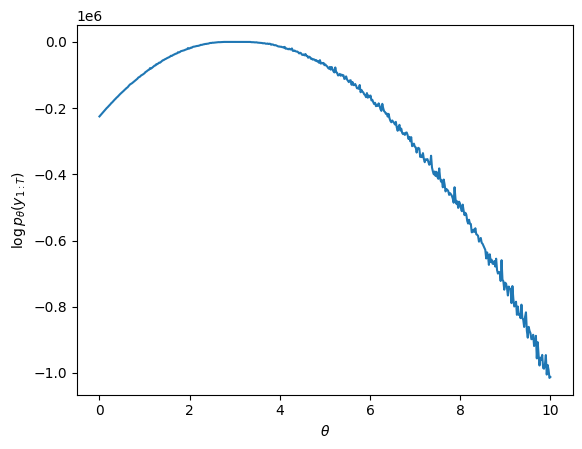

In [5]:
sig = 0.05
sig_prior = 0.01 # variance
mu_prior = 5.0

N = 1000

theta_range = np.linspace(0, 10, 500)
log_ml_list = np.array([])

for theta in theta_range:
    x_samples = rng.normal(mu_prior, np.sqrt(sig_prior), N) 
    log_ml = log_marginal_likelihood(y, theta, x_samples, sig)
    log_ml_list = np.append(log_ml_list, log_ml)
# uncomment and plot your results (do not remove)

plt.plot(theta_range, log_ml_list)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\log p_\theta(y_{1:T})$')
plt.show()

**(v)** Now you have `log_ml_list` variable that corresponds to marginal likelihood values in `theta_range`. Find the $\theta$ value that gives the maximum value in this list and provide your final estimate of most likely $\theta$. **<span style="color:blue">(5 marks)</span>**

In [6]:
# You code goes here
print(theta_range[np.argmax(log_ml_list)])

2.9859719438877756


## Q2: Posterior sampling (35 marks)

In this question, we will perform posterior sampling for the following model
\begin{align*}
    p(x) &\propto \exp(-x_1^2/10 - x_2^2/10 - 2 (x_2 - x_1^2)^2), \\
    p(y | x) &= \mathcal{N}(y; H x, 0.1)
\end{align*}
where $H = [0, 1]$. In this exercise, we assume that we have observed $y = 2$ and would like to implement a few sampling methods.

Before starting this exercise, please try to understand how the posterior density should look like. The discussion we had during the lecture about Exercise 6.2 (see Panopto if you have not attended) should help you here to understand the posterior density. Note though quantities and various details are **different** here. You should have a good idea about the posterior density before starting this exercise to be able to set the hyperparameters such as the chain-length, proposal noise, and the step-size.

In [7]:
y = np.array([2.0])
sig_lik = 0.1
H = np.array([0, 1])

**(i)** In what follows, you will have to code the log-prior and log-likelihood functions. Do **not** use any library, code the log densities directly. **<span style="color:blue">(5 marks)</span>**

In [8]:
def prior(x): # code banana density for visualisation purposes
    # fill in the function
    x1, x2 = x[0], x[1]
    p_x = np.exp(-x1**2 / 10 - x2**2 / 10 - 2 * (x2 - x1**2)**2)
    return p_x

def log_prior(x):
    x1, x2 = x[0], x[1]
    return -x1**2 / 10 - x2**2 / 10 - 2 * (x2 - x1**2)**2

def log_likelihood(y, x, sig_lik):
    #  sig_lik is variance
    mu = H.dot(x)
    return -0.5 * np.log(2 * np.pi * sig_lik) \
- 0.5 * ((y - mu)**2 / sig_lik)

# uncomment below and evaluate your prior and likelihood (do not remove)
print(log_prior([0, 1]))
print(log_likelihood(y, np.array([0, 1]), sig_lik))

-2.1
[-4.76764599]


**(ii)** Next, implement **the random walk Metropolis algorithm (RWMH)** for this target. Set an appropriate chain length, proposal variance, and `burnin` value. Plot a scatter-plot with your samples (see the visualisation function below). Use log-densities only. **<span style="color:blue">(10 marks)</span>**

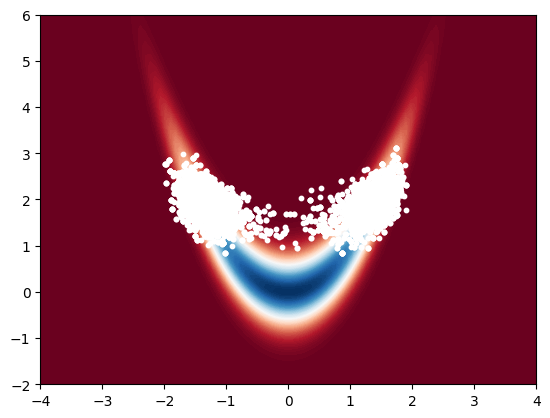

In [9]:
# fill in your code here
def log_post(x, y):
    return log_prior(x) + log_likelihood(y, x, sig_lik)

def log_r(x_s, x, y_obs):
    return log_post(x_s, y_obs) - log_post(x, y_obs)

N = 10000
burnin = 1000
x0 = np.array([0,0]) # initial value
sigma_q = [0.5, 0.5] # proposal variance
y_obs = np.array([2.0]) # observed y

samples = []
accept_rate = 0
x = x0
for i in range(N):
    x_s = x + rng.normal(0, sigma_q, size=x.shape)
    u = rng.uniform(0, 1, 1)
    if np.log(u) < log_r(x_s, x, y_obs):
        x = x_s
        accept_rate += 1
    # else x is still X_n-1 and still added to samples
    samples.append(x) 

accept_rate /= N
samples = np.array(samples[burnin:])
# print(accept_rate)

# uncomment and plot your results (do not remove)
x_bb = np.linspace(-4, 4, 100)
y_bb = np.linspace(-2, 6, 100)
X_bb , Y_bb = np.meshgrid(x_bb , y_bb)
Z_bb = np.zeros((100 , 100))
for i in range(100):
    for j in range(100):
        Z_bb[i, j] = prior([X_bb[i, j], Y_bb[i, j]])
plt.contourf(X_bb , Y_bb , Z_bb , 100 , cmap='RdBu')
plt.scatter(samples[:, 0], samples[:, 1], s=10 , c='white')
plt.show()

**(iii)** Now implement **Metropolis-adjusted Langevin algorithm**. For this, you will need to code the gradient of the density and use it in the proposal as described in the lecture notes. Set an appropriate chain length, step-size, and `burnin` value. Plot a scatter-plot with your samples (see the visualisation function below). Use log-densities only. **<span style="color:blue">(10 marks)</span>**

-4.5352919734153
acceptance rate; 0.3867


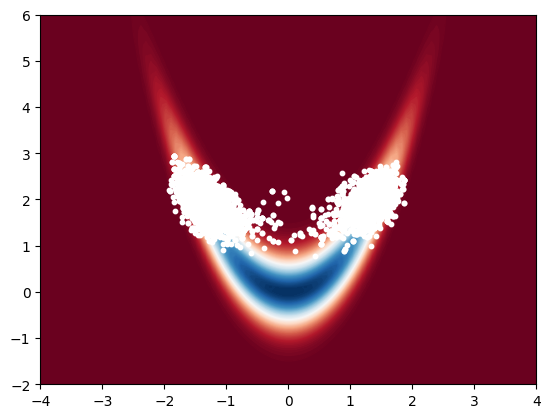

In [10]:
gam = 0.01
N = 10000
burnin = 2000
x0 = np.array([0, 0]) # initial value

def grad_log_prior(x): # fill in the arguments
    return np.array([-x[0] / 5 + 8 * x[0] * (x[1] - x[0]**2),
                     -x[1] / 5 - 4 * (x[1] - x[0]**2)])

def grad_log_likelihood(y, x, sig_lik):
    mu = H.dot(x)
    gradient = -(1 / sig_lik) * (mu - y)
    return np.array([0, gradient[0]])

def grad_log_post(x, y):
    return grad_log_prior(x) + grad_log_likelihood(y, x, sig_lik)

def log_MALA_kernel(x, x_curr, gam, y_obs):
    m = x_curr + gam * grad_log_post(x_curr, y_obs) # mean_proposal
    # var proposal is diag(2gam, 2gam)
    var = 2 * gam * np.array([[1, 0], [0, 1]])
    # the kernel is just the pdf of Normal(x; m, var)
    norm_factor = np.sqrt((2 * np.pi) ** 2 * np.linalg.det(var))
    # MALAkernel = np.exp(-0.5 * (x-m).T @ np.linalg.inv(var) @ 
    # (x-m)) / norm_factor
    logkernel = -0.5 * (x-m).T @ np.linalg.inv(var) @ (x-m) \
    - np.log(norm_factor)
    return logkernel

# test
print(log_MALA_kernel(x0, x0, 0.05, y_obs))

def log_r(x_s, x_curr, y_obs):
    return log_post(x_s, y_obs) - log_post(x_curr, y_obs)


y_obs = np.array([2.0]) # observed y
samples_MALA = []
accept_rate = 0
x_curr = x0
for i in range(N):
    # simulate new x based on x_curr
    m = x_curr + gam * grad_log_post(x_curr, y_obs)
    var = 2 * gam * np.array([[1, 0], [0, 1]])  # diagonal(gam, gam)
    # directly sampling from distribution
    x_s = rng.multivariate_normal(m, np.sqrt(var)) 
    # I can also use xn = xn-1 + gam*gradlogpost + 
    # sqrt(2*gam)*normal([0,0], np.eye(2)), 
    # but this has worse performance
    # x_s = x_curr + gam * grad_log_post(x_curr, y_obs) \
    # + np.sqrt(2*gam)*rng.multivariate_normal([0, 0], np.eye(2))
    ln_r = log_r(x_s, x_curr, y_obs)
    u = rng.uniform(0, 1, 1)
    if np.log(u) < ln_r:
        x_curr = x_s
        accept_rate += 1
    # else x is still X_n-1 and still added to samples
    samples_MALA.append(x_curr) 

accept_rate /= N
samples_MALA = np.array(samples_MALA[burnin:])
print("acceptance rate;", accept_rate)

# uncomment and plot your results (do not remove)
x_bb = np.linspace(-4, 4, 100)
y_bb = np.linspace(-2, 6, 100)
X_bb , Y_bb = np.meshgrid(x_bb , y_bb)
Z_bb = np.zeros((100 , 100))
for i in range(100):
    for j in range(100):
        Z_bb[i, j] = prior([X_bb[i, j], Y_bb[i, j]])
cnt = plt.contourf(X_bb, Y_bb, Z_bb, 100, cmap='RdBu')
for c in cnt.collections:
    c.set_edgecolor("face")
plt.scatter(samples_MALA[:, 0], samples_MALA[:, 1], s=10 , c='white')
plt.show()


**(iv)** Next, implement **unadjusted Langevin algorithm**. For this, you will need to code the gradient of the density and use it in the proposal as described in the lecture notes. Set an appropriate chain length, step-size, and `burnin` value. Plot a scatter-plot with your samples (see the visualisation function below). Use log-densities only. **<span style="color:blue">(10 marks)</span>**

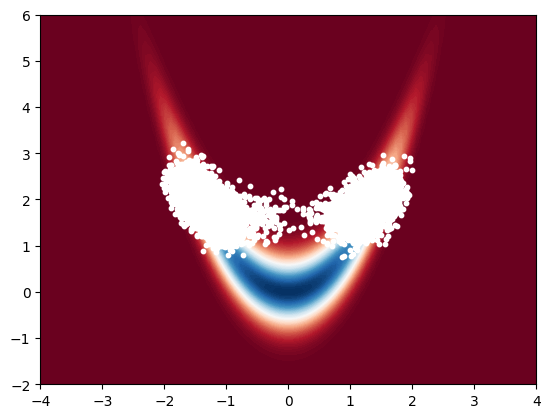

In [13]:
gam = 0.01
N = 10000
burnin = 2000
y_obs = np.array([2.0]) # observed y
samples_ULA = []
x_curr = np.array([0,0]) # initial value
for i in range(N):
    # simulate new x based on x_curr
    mean_proposal = x_curr + gam * grad_log_post(x_curr, y_obs)
    var_proposal = 2 * gam * np.array([[1, 0], [0, 1]])
    # x_s = rng.multivariate_normal(mean_proposal, np.sqrt(var_proposal)) 
    # this has worse performance
    x_s = x_curr + gam * grad_log_post(x_curr, y_obs) \
    + np.sqrt(2*gam)*rng.multivariate_normal([0, 0], np.eye(2))
    x_curr = x_s # no rejection step
    samples_ULA.append(x_curr)

samples_ULA = np.array(samples_ULA[burnin:])

# uncomment and plot your results (do not remove)
x_bb = np.linspace(-4, 4, 100)
y_bb = np.linspace(-2, 6, 100)
X_bb , Y_bb = np.meshgrid(x_bb , y_bb)
Z_bb = np.zeros((100 , 100))
for i in range(100):
    for j in range(100):
        Z_bb[i, j] = prior([X_bb[i, j], Y_bb[i, j]])
plt.contourf(X_bb , Y_bb , Z_bb , 100 , cmap='RdBu')
plt.scatter(samples_ULA[:, 0], samples_ULA[:, 1], s=10 , c='white')
plt.show()

## Q3: Gibbs sampling for 2D posterior (25 marks)

In this question, you will first derive a Gibbs sampler by deriving full conditionals. Then we will describe a method to estimate marginal likelihoods using Gibbs output (and you will be asked to implement the said method given the description).

Consider the following probabilistic model
\begin{align*}
p(x_1) &= \mathcal{N}(x_1; \mu_1, \sigma_1^2), \\
p(x_2) &= \mathcal{N}(x_2; \mu_2, \sigma_2^2), \\
p(y | x_1, x_2) &= \mathcal{N}(y; x_1 + x_2, \sigma_y^2),
\end{align*}
where $y$ is a scalar observation and $x_1, x_2$ are latent variables. This is a simple model where we observe a sum of two random variables and want to construct possible values of $x_1, x_2$ given the observation $y$.

**(i)** Derive the Gibbs sampler for this model, by deriving full conditionals $p(x_1 | x_2, y)$ and $p(x_2 | x_1, y)$ (You can use Example 3.2 but note that this case is different). **<span style="color:blue">(10 marks)</span>**


We want to derive the full conditionals $p(x_1 | x_2, y)$ and $p(x_2 | x_1, y)$ for the Gibbs sampler.

To derive the full conditionals, we consider the joint distribution of $x_1$ and $x_2$ given $y$:
\begin{align*}
p(x_1, x_2 | y) &\propto p(x_1)p(x_2)p(y|x_1, x_2) \\
&\propto \exp\left(-\frac{1}{2}\left[\frac{(x_1 - \mu_1)^2}{\sigma_1^2} + \frac{(x_2 - \mu_2)^2}{\sigma_2^2} + \frac{(y - x_1 - x_2)^2}{\sigma_y^2}\right]\right).
\end{align*}

By assuming $x_1$ and $x_2$ are independent, we can isolate the terms involving $x_1$ and $x_2$, and find 
$p(x_1 | x_2, y)$:
\begin{align*}
p(x_1 | x_2, y) &\propto \exp\left(-\frac{1}{2}\left[\frac{(x_1 - \mu_1)^2}{\sigma_1^2} + \frac{(y - x_1 - x_2)^2}{\sigma_y^2}\right]\right) \\
&\propto \exp\left(-\frac{1}{2} \frac{(x_1 - \mu_{x_1|y})^2}{\sigma_{x_1|y}^2 } \right),
\end{align*}
where we expand and complete the squares to find $\mu_{x_1|y}$ and $\sigma_{x_1|y}$:
\begin{align*}
\exp\left(-\frac{1}{2}\left[\frac{(x_1 - \mu_1)^2}{\sigma_1^2} + \frac{(y - x_1 - x_2)^2}{\sigma_y^2}\right]\right) \\
=& \frac{\sigma_1^2 + \sigma_y^2}{\sigma_1^2 \sigma_y^2} \left( x_1^2 - 2 \frac{\mu_1 \sigma_y^2 + (y-x_2)\sigma_1^2}{\sigma_1^2 + \sigma_y^2} x_1 + \frac{\mu_1^2 \sigma_y^2 + (y-x_2)^2 \sigma_1^2}{\sigma_1^2 + \sigma_y^2}      \right) \\
=& \frac{\sigma_1^2 + \sigma_y^2}{\sigma_1^2 \sigma_y^2} \left(  x_1-    \frac{\mu_1 \sigma_y^2 + (y-x_2)\sigma_1^2}{\sigma_1^2 + \sigma_y^2}        \right)^2  + C
\end{align*}
Hence we have 
\begin{align*}
\frac{1}{\sigma_{x_1|y}^2} &= \frac{\sigma_1^2 + \sigma_y^2}{\sigma_1^2 \sigma_y^2} = \frac{1}{\sigma_1^2} + \frac{1}{\sigma_y^2}, \\
\mu_{x_1|y} &= \frac{\mu_1 \sigma_y^2 - \sigma_1^2 x_2 + \sigma_1^2 y}{\sigma_1^2 + \sigma_y^2} \\
&= \sigma_{x_1|y}^2 \left(\frac{\mu_1}{\sigma_1^2} + \frac{y - x_2}{\sigma_y^2}\right).
\end{align*}
i.e. $x_1 | x_2, y \sim \mathcal{N}\left(\frac{\mu_1 \sigma_y^2 - \sigma_1^2 x_2 + \sigma_1^2 y}{\sigma_1^2 + \sigma_y^2}, \frac{\sigma_1^2 \sigma_y^2}{\sigma_1^2 + \sigma_y^2}\right) $ 

By symmetry we have $p(x_2 | x_1, y)$:
\begin{align*}
p(x_2 | x_1, y) \propto \exp\left(-\frac{1}{2} \frac{(x_2 - \mu_{x_2|y})^2}{\sigma_{x_2|y}^2 } \right).
\end{align*}
where
\begin{align*}
\frac{1}{\sigma_{x_2|y}^2} &= \frac{1}{\sigma_2^2} + \frac{1}{\sigma_y^2}, \\
\mu_{x_2|y} &= \sigma_{x_2|y}^2 \left(\frac{\mu_2}{\sigma_2^2} + \frac{y - x_1}{\sigma_y^2}\right).
\end{align*}
$x_2 | x_1, y \sim \mathcal{N}\left(\frac{\mu_2 \sigma_y^2 - \sigma_2^2 x_1 + \sigma_2^2 y}{\sigma_2^2 + \sigma_y^2}, \frac{\sigma_2^2 \sigma_y^2}{\sigma_2^2 + \sigma_y^2}\right) $ 

Thus, the Gibbs sampler will alternate between sampling from $p(x_1 | x_2, y)$ and $p(x_2 | x_1, y)$ using these full conditionals.



**(ii)** Let us set $y = 5$, $\mu_1 = 0$, $\mu_2 = 0$, $\sigma_1 = 0.1$, $\sigma_2 = 0.1$, and $\sigma_y = 0.01$.

Implement the Gibbs sampler you derived in Part (i). Set an appropriate chain length and `burnin` value. Plot a scatter plot of your samples (see the visualisation function below). Discuss the result: Why does the posterior look like this? **<span style="color:blue">(15 marks)</span>**

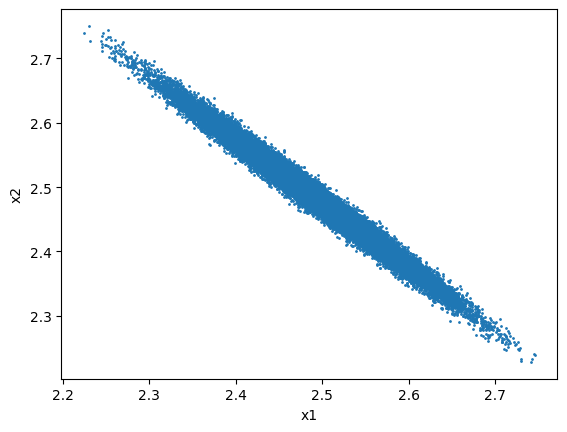

In [12]:
y = 5

mu1 = 0
mu2 = 0
sig1 = 0.1
sig2 = 0.1
sig_y = 0.01

N = 50000
burnin = 1000
x1 = 0
x2 = 0

# Lists to store the samples
x1_samples = []
x2_samples = []
for _ in range(N):
    # Sampling x1 from its conditional distribution
    mean_x1 = (mu1 * sig_y**2 + sig1**2 * y - sig1**2 * x2) / (sig1**2 + sig_y**2)
    var_x1 = (sig1**2 * sig_y**2) / (sig1**2 + sig_y**2)
    x1 = np.random.normal(mean_x1, np.sqrt(var_x1))

    mean_x2 = (mu2 * sig_y**2 + sig2**2 * y - sig2**2 * x1) / (sig2**2 + sig_y**2)
    var_x2 = (sig2**2 * sig_y**2) / (sig2**2 + sig_y**2)
    x2 = np.random.normal(mean_x2, np.sqrt(var_x2))

    x1_samples.append(x1)
    x2_samples.append(x2)

x1_samples = np.array(x1_samples[burnin:])
x2_samples = np.array(x2_samples[burnin:])

# uncomment and plot your results (do not remove)
plt.scatter(x1_samples, x2_samples, s=1)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Since $y$ follows $\mathcal{N}(y; x_1 + x_2, \sigma_y^2)$ and is observed to be 5, the joint posterior distribution of $x_1$ and $x_2$ is reflected in the scatterplot as a tendency towards the line $x_1+x_2=5$. 

In particular, the Gibbs sampling iteratively samples from the conditional distributions of $x_1$ and $x_2$, such that when large $x_1$ (close to 5) is sampled, $x_2$ will more likely be sampled small (close to 0) and vice versa. 

The concentration of samples near the center point $(2.5, 2.5)$ can be attributed to the normal distribution's properties. Due to the symmetry of $x_1$ and $x_2$'s definitions, the case when $x_1$ and $x_2$ equally contributes to the sum 5 (i.e. $x_1 = x_2 = 2.5$) would be the most natural representation of this sum and hence the most probable case, especially when no other information biases the distribution towards one variable over the other. Therefore, the scatterplot is mostly dense around the mean $(2.5, 2.5)$ and symmetrical across $x_1 = x_2$

Additionally, the samll value of $\sigma_y = 0.01$ is reflected by a tighter concentration of samples along $x_1+x_2=5$, with most samples having a distance less than 0.02 to the line.
